# Klasyfikacja za pomocą algorytmu wektorów wspierających (SVM)

Na tych ćwiczeniach zapoznamy się z zastosowaniem SVM do klasyfikacji.


### Przygotowanie środowiska programistycznego

In [1]:
import numpy as np
import matplotlib.pylab as plt
from termcolor import colored
import pandas as pd
import seaborn as sns

from sklearn.svm import SVC
from sklearn import datasets
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

def printScores(model, X, Y):
    print(colored("Classification report:","blue"))
    print(classification_report(Y, model.predict(X)))
    print(colored("Confusion matrix:","blue"))
    print(confusion_matrix(Y, model.predict(X)))

## Zbiór danych irysy
Tak jak w notebooku "06_Klasyfikator_Bayesa_irysy" używać będziemy zbioru `Iris`. Dla wygodny ponownie umieścimy dane w `pandas.DataFrame`.

**Proszę:**
* załadować dane za pomocą `sklearn.dataset.load_iris`,
* etykiety umieścić w kolumnie ```label```
* umieścić dane w `pandas.DataFrame`
* wypisać dostępne kolumny

In [2]:
#BEGIN_SOLUTION
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df["label"] = iris.target
print(iris_df.columns)
#END_SOLUTION

iris_df.describe()

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'label'],
      dtype='object')


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


#### Przygotowanie danych

W pierwszej części ćwiczeń zapoznamy się ze specyfiką modeli SVM. Wyłącznie w celu ułatwienia wizualizacji ograniczymy się na razie do dwóch cech i dwóch klas. 

**Proszę:**
- utworzyć nowy `pandas.DataFrame` zawierający jedynie cechy `petal width (cm)`,  `petal length (cm)`
- proszę wypisać na ekran początek ("głowę") danych zawartych w stworzonym obiekcie DataFrame

In [3]:
#BEGIN_SOLUTION
chosen_features=['petal length (cm)','petal width (cm)']
drop_columns=['sepal length (cm)','sepal width (cm)']

df = iris_df[(iris_df.label== 0) | (iris_df.label== 1)]
df = df.drop(columns=drop_columns)

df.head()
#END_SOLUTION
pass

## Analiza wizualna danych

**Proszę:**
* narysować dwuwymiarowy wykres punktowy cech X=`petal length (cm)`, Y=`petal width (cm)` z podziałem na klasy
* na podstawie rysunku proszę stwierdzić czy klasy są łatwo separowalne

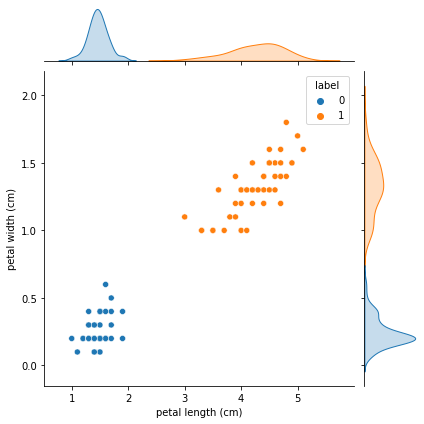

In [4]:
#BEGIN_SOLUTION
sns.jointplot(x=chosen_features[0], y=chosen_features[1], data=df, hue='label');
#END_SOLUTION
pass

## Definicja i trening klasyfikatora


**Proszę:**
* utworzyć zmienną ```model``` klasy  ```SVC```. Aby uzyskać model liniowy należy podać parametr `kernel = linear`,
* przeprowadzić trening z użyciem funkcji ```fit()```
* za pomocą funkcji ```printScores()```  dla zbioru uczącego wypisać miary jakości oraz macierz pomyłek
* na podstawie analizy metryk proszę stwierdzić jak dobrze klasy zostały odseparowane

In [5]:
#BEGIN_SOLUTION
model = SVC(kernel='linear')
model.fit(df[chosen_features], df.label)
printScores(model, df[chosen_features], df.label)  
#END_SOLUTION
pass

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Confusion matrix:
[[50  0]
 [ 0 50]]


## Wizualizacja separacji klas

Działąnie modelu można zobrazować za pomocą położenia wektorów wspierających oraz granic funkcji decyzyjnej.

**Proszę:**
- wypisać wektory wspierające za pomocą funkcji `SVC.support_vectors_`. Oczekiwany wynik to:
```Python
Support vectors: 
 [[1.9 0.4]
 [3.  1.1]]
```
* korzystając z funkcji `plot_support_vectors` i `plot_decision_function` na jednym rysunku narysować:
    -dane
    - wektory wspierające 
    - granice funkcji decyzyjnej. 

In [6]:
def plot_support_vectors(support_vectors, axis):
  axis.scatter(support_vectors[:,0], support_vectors[:,1],s=100,
               linewidth=1, facecolors='none', edgecolors='k')
  
def plot_decision_function(model, columns, axis):
  xlim = axis.get_xlim()
  ylim = axis.get_ylim()
  xx = np.linspace(xlim[0], xlim[1], 30)
  yy = np.linspace(ylim[0], ylim[1], 30)
  YY, XX = np.meshgrid(yy, xx)
  xy = np.vstack([XX.ravel(), YY.ravel()]).T
  xy = pd.DataFrame(data=xy, columns = columns);  
  Z = model.decision_function(xy).reshape(XX.shape)
    
  beta = np.sum(model.support_vectors_*model.dual_coef_.T,axis=0)
  betaMag = np.sqrt(np.sum(beta*beta))  
  intercept = model.intercept_
  yVtx =  (ylim[0] + ylim[1])/2
  xVtx =  (-intercept - beta[1]*yVtx)/beta[0]   
  if xVtx<xlim[0] or xVtx>xlim[1]:
    xVtx =  (xlim[0] + xlim[1])/2
    yVtx =  (-intercept - beta[0]*yVtx)/beta[1]
  if xVtx>xlim[0] and xVtx<xlim[1] and yVtx>ylim[0] and yVtx<ylim[1]:   
      axis.quiver(xVtx, yVtx, beta[0], beta[1], angles='xy', scale_units="xy", label=r'$\vec{\beta}$')

  axis.contour(
      XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
  )
  axis.grid(True)
  axis.legend()  

Support vectors: 
 [[1.9 0.4]
 [3.  1.1]]


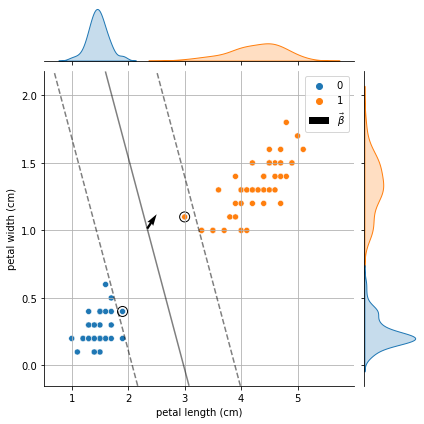

In [7]:
#BEGIN_SOLUTION
print(colored("Support vectors: \n","blue"),model.support_vectors_)
graph=sns.jointplot(x=chosen_features[0], y=chosen_features[1], data=df, hue='label')
plot_support_vectors(model.support_vectors_, graph.ax_joint)
plot_decision_function(model, ['petal length (cm)','petal width (cm)'], axis=graph.ax_joint)
#END_SOLUTION
pass

Poprzednim razem, gdy pracowaliśmy ze zbiorem danych `Iris` zaczęliśmy od normalizacji danych. Sprawdźmy, czy normalizacja wpływa na model SVM.
Poprzednim razem normalizowaliśmy dane podając wzór explicite , "ręcznie". Teraz zrobimy to za pomocą `sklearn.preprocessing.StandardScaler`

**Proszę:**
* utworzyć nowy `pandas.DataFrame` zawierający znormalizowane cechy `['petal length (cm)','petal width (cm)']`. Do normalizacji wykorzystaj `sklearn.preprocessing.StandardScaler`, wcześniej importując odpowiednią bibliotekę,
* utworzyć model liniowy SVM i wyuczyć go na znormalizowanych danych,
* przedstawić zna jednym rysunku normalizowane dane, wektory wspierające i granicę decyzyjną modelu.

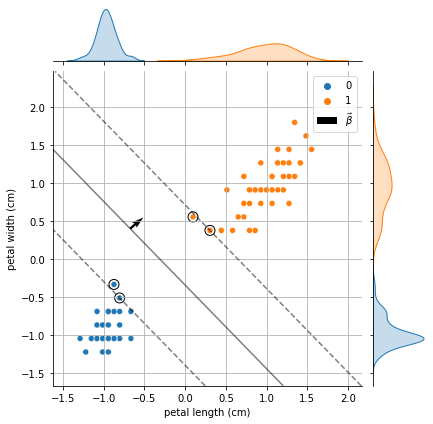

In [8]:
#BEGIN_SOLUTION
from sklearn.preprocessing import StandardScaler
df_norm=pd.DataFrame()
df_norm['label']=df.label
scaler=StandardScaler()
df_norm[chosen_features]=scaler.fit_transform(df[chosen_features])

model = SVC(kernel='linear')
model.fit(df_norm[chosen_features], df_norm.label)

graph=sns.jointplot(x=chosen_features[0], y=chosen_features[1], data=df_norm, hue='label')
plot_support_vectors(model.support_vectors_, graph.ax_joint)
plot_decision_function(model, ['petal length (cm)','petal width (cm)'], graph.ax_joint)
#END_SOLUTION
pass

Porównując z poprzednim rysunkiem, powinniśmy otrzymać inną granicę decyzyjną pomimo tego, że dane mają ten sam kształt.

**Normalizacja jest bardzo ważna dla modeli SVM!**

### Klasyfikacja miękkiego marginesu

Sprawdźmy teraz jak model liniowy SVM sprawdzi się do klasyfikacji klas `1` i `2`, które nie są już w pełni odseparowane

**Proszę:**
* przygotować nowy `pandas.DataFrame` zawierający **znormalizowane** cechy `['petal length (cm)','petal width (cm)']` dla klas `1`, `2`,
* narysować przygotowany zbiór danych.
* na podstawie analizy rysunku stwierdzić czy dane są łatwo separowalne, czy też klasy się częściowo przekrywają

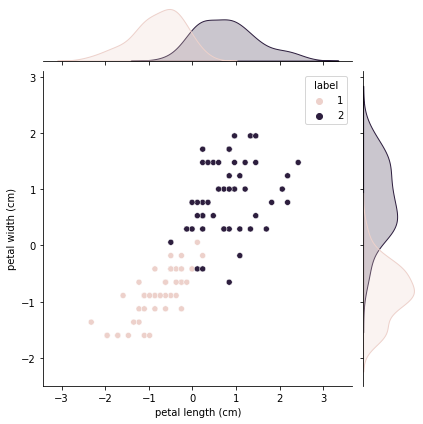

In [9]:
df = iris_df[(iris_df.label== 1) | (iris_df.label== 2)]
df = df.drop(columns=drop_columns)
scaler=StandardScaler()
df[chosen_features]=scaler.fit_transform(df[chosen_features])
df.head()
sns.jointplot(x=chosen_features[0], y=chosen_features[1], data=df, hue='label');

**Proszę:**

- utworzyć model liniowy SVM i wytrenować go
- narysować zbiór danych oraz wektory wspierające i granice funkcji decyzyjnej modelu
- wypisać miary jakości. Oczekiwany wynik dla macierzy pomyłek to:

```Python
Confusion matrix:
[[47  3]
 [ 3 47]]
```

Classification report:
              precision    recall  f1-score   support

           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100

Confusion matrix:
[[47  3]
 [ 3 47]]


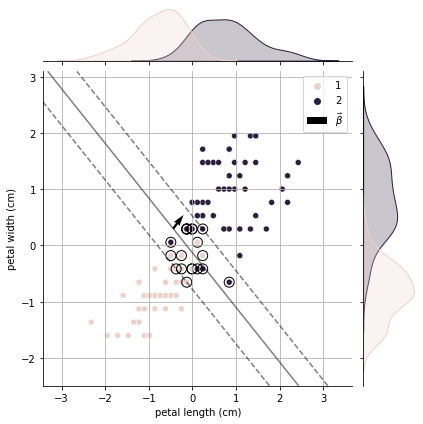

In [10]:
model = SVC(kernel='linear')
model.fit(df[chosen_features], df.label)

graph=sns.jointplot(x=chosen_features[0], y=chosen_features[1], data=df, hue='label')
plot_support_vectors(model.support_vectors_, graph.ax_joint)
plot_decision_function(model, ['petal length (cm)','petal width (cm)'], graph.ax_joint)
printScores(model, df[chosen_features], df.label)  

Tym razem klasy nie są odseparowane, więc model musi czasem się mylić.

Model SVM ma hiperparametr `C` odpowiadający za szerokość marginesu.

**Proszę:**
* narysować dane, granice decyzyjne i wektory nośne dla hiperparametru `C` równego `0.1`, `1`,`100`.

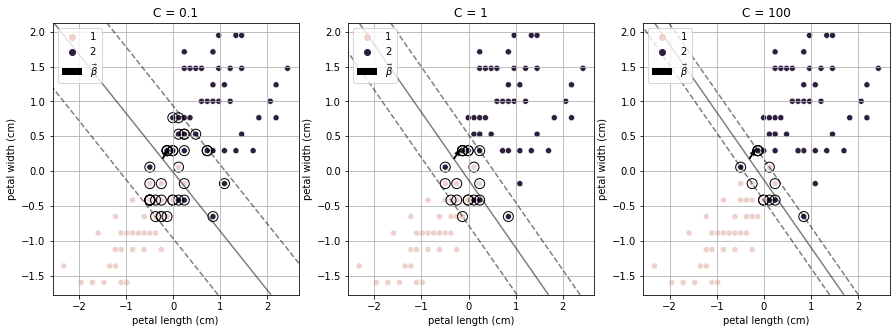

In [11]:
fig, axes=plt.subplots(1,3, figsize=(15,5))

#BEGIN_SOLUTION
C_values=[0.1,1,100]
for ax, C in zip(axes, C_values):
  model = SVC(kernel='linear', C=C)
  model.fit(df[chosen_features], df.label)
  graph=sns.scatterplot(x=chosen_features[0], y=chosen_features[1], data=df, hue='label',ax=ax)
  plot_support_vectors(model.support_vectors_, ax)
  plot_decision_function(model, ['petal length (cm)','petal width (cm)'], ax)
  ax.set_title("C = {}".format(C))
#END_SOLUTION
pass

## Zbiory nieseparowalne liniowo

Liniowe klasyfikatory w wielu przypadkach sprawdzają się bardzo dobrze, jednak wiele zbiorów nie jest liniowo rozdzielnych.

#### Okręgi 
Na początek potrzebujemy wygenerować liniowo nierozdzielny zbiór danych. `sklearn.datasets` oferuje funkcję `make_circles` tworzącą dane w kształcie współśrodkowych okręgów, które z całą (na pewno?) pewnością nie są liniowo separowalne.

**Proszę:**

* korzystając z `sklearn.datasets.make_circles` stwórz dane do anlizy. Przygotuj 1000 punktów z parametrami  ```factor=0.1``` oraz poziomem szumów ```noise =0.1 ```,
* umieść wygenerowane dane w `pandas.DataFrame` o kolumnach `x1`,`x2`,`label`
* narysować wykres punktowy cech `x1` i `x2` z uwzględnieniem przynależności do klas


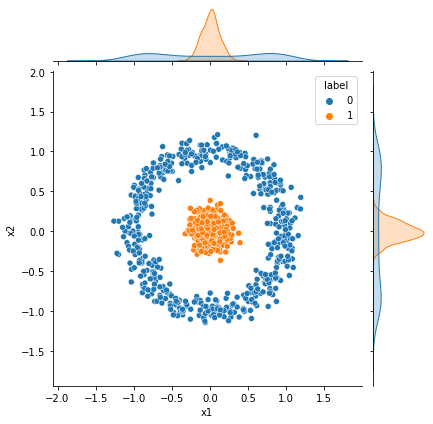

In [12]:
X, Y = datasets.make_circles(1000, factor=.1, noise=.1)
df=pd.DataFrame(X, columns=('x1','x2'))
df['label']=Y
sns.jointplot(x='x1',y='x2', data=df,hue='label');

Dane mamy gotowe, sprawdźmy jak liniowy mode SVM sobie z nimi (nie)poradzi

**Proszę:**
* utworzyć model liniowy `SVM` i wyuczyć go na przygotowanych danych
* narysować wykres punktowy cech `x1` i `x2` z uwzględnieniem przynależności do klas, wektorami nośnymi i granicami decyzyjnymi (wykorzystaj przygotowane wcześniej funkcje)
* wypisać miary jakości. Oczekiwany wynik dla macierzy pomyłek to:

```Python
Confusion matrix:
[[181 319]
 [  0 500]]
```

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.36      0.53       500
           1       0.61      1.00      0.76       500

    accuracy                           0.68      1000
   macro avg       0.80      0.68      0.64      1000
weighted avg       0.80      0.68      0.64      1000

Confusion matrix:
[[180 320]
 [  0 500]]


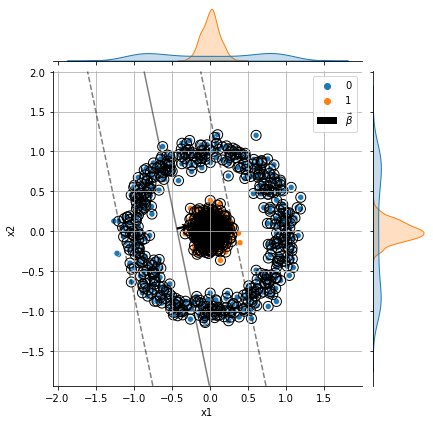

In [13]:
#BEGIN_SOLUTION
model = SVC(kernel='linear')
model.fit(df.drop(columns=['label']), df.label)
graph=sns.jointplot(x='x1', y='x2', data=df, hue='label')
plot_support_vectors(model.support_vectors_, graph.ax_joint)
plot_decision_function(model, ['x1','x2'], graph.ax_joint)
printScores(model, df.drop(columns=['label']), df.label)  
#END_SOLUTION
pass

Jedną z możliwości poradzenie sobie z takim problem jest _feature engineering_, tzn. dodanie nowych cech, które lepiej opisywać będą nasz model. Jeżeli wymyślimy cechę, w której nasze dane będą separowalne liniowo to możemy dalej przeprowadzać klasyfikację liniową. W przypadku naszego zbioru danych w kształcie okręgów taką cechą jest ich promień.

**Proszę:**
* dodać nową cechę `radius2` będącą sumą kwadratów cech `x1` i `x2`,
* narysować dwuwymiarowy wykres cech X=`x1` i Y=`radius` z uwzględnieniem przynależności do klas,
* utworzyć model i wyuczyć go na przygotowanych danych, z użyciem zmiennych `x1` i `radius2`
* wypisać miary jakości.

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Confusion matrix:
[[500   0]
 [  0 500]]


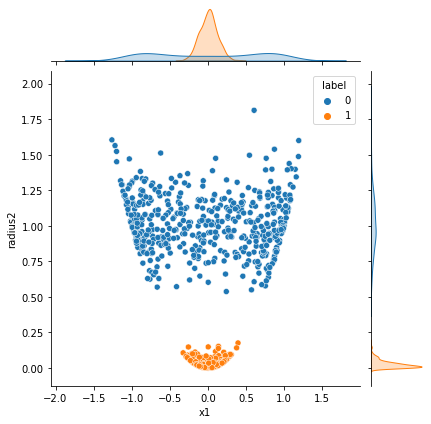

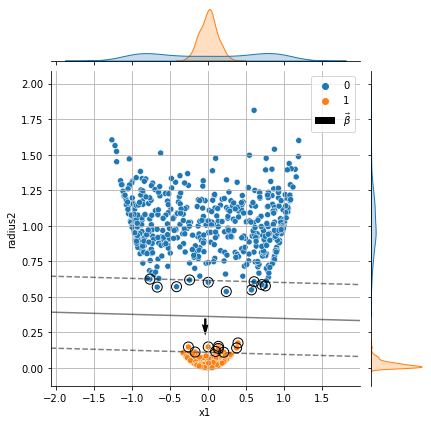

In [14]:
#BEGIN_SOLUTION
df['radius2']=(df.x1**2+df.x2**2)
sns.jointplot(x='x1',y='radius2', data=df,hue='label');

model = SVC(kernel='linear')
model.fit(df[['x1','radius2']], df.label)
graph=sns.jointplot(x='x1', y='radius2', data=df, hue='label')
plot_support_vectors(model.support_vectors_, graph.ax_joint)
plot_decision_function(model, ["x1", "radius2"],graph.ax_joint)
printScores(model, df.drop(columns=['x2','label']), df.label) 
#END_SOLUTION
pass

#### Sierpy

Dla danych o kształcie okręgów udało nam się wymyślić cechę pozwalającą na separację liniową. Zazwyczaj jednak wymyślenie takiej cechy jest bardzo trudne i wymaga bardzo dużej wiedzy o zbiorze danych.

Spróbujmy szczęścia ze zbiorem w kształcie sierpów generowanym przez `sklearn.datasets.make_moons`.

**Proszę**:
* korzystając z `sklearn.datasets.make_moons` przygotować dane. Przygotuj 1000 punktów z poziomem szumów równym 0.1,
* umieścić wygenerowane dane w `pandas.DataFrame` o kolumnach `x1`,`x2`,`label`
* narysować wykres punktowy cech `x1` i `x2` z uwzględnieniem przynależności do klas

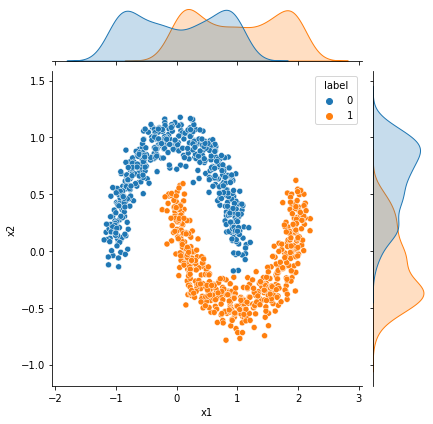

In [15]:
X, Y = datasets.make_moons(1000, noise=.1)
df=pd.DataFrame(X, columns=('x1','x2'))
df['label']=Y
sns.jointplot(x='x1',y='x2', data=df,hue='label');

Po krótkim namyśłe prawdopobnie nie jesteśmy wstanie podać żadnej cechy, która rozwiązałaby nasz problem. W takim razie możemy podążyć kilkoma drogami:
1. Dalej brnąć w modyfikowanie zbioru danych, np. dodać kolejne cechy korzystając z rozwinięcia wielomianowego (np. dla rozwinięcią wielomianowego stopnia 2  ze zbioru cech `(a,b,c)` dostaniemy cechy `(a, b, c, a*b, a*c, b*c, a*a, b*b, c*c)`. W tym przypadku ryzykujemy, że znacząco zwiększymy rozmiar zbioru danych, większość wygenerowanych cech i tak nie będzie zbyt istotna, a model stanie się bardziej podatny na przetrenowanie. `sklearn.preprocessing` ma oczywiście przygotowaną do tego gotową funkcję `PolynomialFeatures`.
1. Zmienić model na nieliniowy.

## Klasyfikacja nieliniowa SVM

W dalszej części wybierzemy opcję 2., co w naszym przypadku oznacza odejście od modelu liniowego SVM na rzecz modeli SVM z jądrem. Przetestujemy jądra wielomianowe oraz gaussowkie rbf.


**Proszę:**
* wyszkolić serię modeli SVM z jądrem wielomianowym o stopniach 2, 3 i 4. Rodzaj jądra można ustawić parametrem `kernel = 'poly'`, natomiast za stopnień wielomianu odpowiada parametr `degree`. Parametr `C` powinien być taki sam dla wszystkich modeli, proszę użyć `0.1`
* dla każdego modelu wykonać rysunek danych, wektorów wspierających i granicy decyzyjnej.

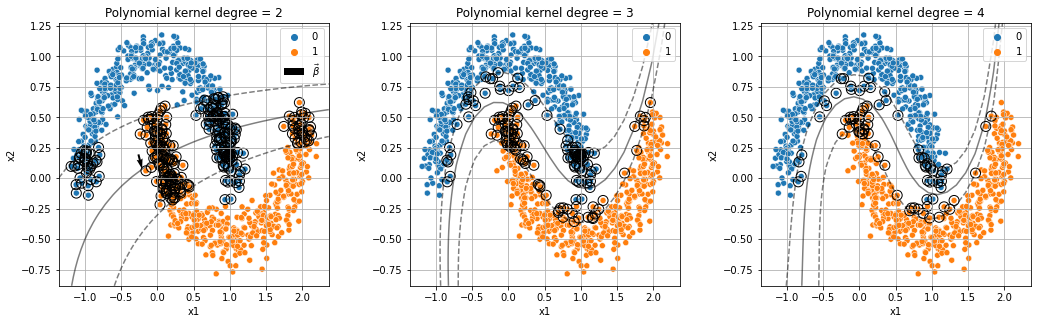

In [16]:
#BEGIN_SOLUTION
_, axes=plt.subplots(1,3, figsize=(15,5))
degree_range=[2,3,4]
for ax, degree in zip(axes, degree_range):
  model =  SVC(kernel='poly', C=0.1, degree=degree, coef0=1)
  model.fit(df[['x1','x2']], df.label)
  sns.scatterplot(x='x1', y='x2', data=df, hue='label',ax=ax)
  plot_support_vectors(model.support_vectors_, ax)
  plot_decision_function(model, ['x1','x2'], ax)
  ax.set_title("Polynomial kernel degree = {}".format(degree))
plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3) 
#END_SOLUTION
pass

**Proszę:**
* wyszkolić serię modeli SVM z jądrem gaussowskim: `rbf` o współczynnikach $\gamma $ równych `0.01`, `1` i `10`. Rodzaj jądra można ustawić parametrem `kernel = 'rbf'`, natomiast współczynnik $\gamma$ można kontrolować parametrem `gamma`. Parametr `C` powinien być taki sam dla wszystkich modeli. Proszę użyć wartości `0.1`
* dla każdego modelu wykonać rysunek danych, wektorów wspierających i granicy decyzyjnej.

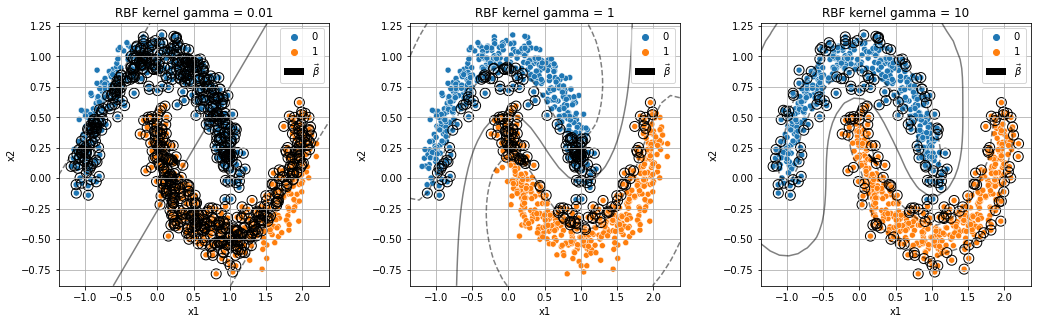

In [17]:
#BEGIN_SOLUTION
_, axes=plt.subplots(1,3, figsize=(15,5))
gamma_range=[0.01,1,10]
for ax, gamma in zip(axes, gamma_range):
  model = SVC(kernel='rbf', C=0.1, gamma=gamma)
  model.fit(df[['x1','x2']], df.label)
  sns.scatterplot(x='x1', y='x2', data=df, hue='label',ax=ax)
  plot_support_vectors(model.support_vectors_, ax)
  plot_decision_function(model, ["x1","x2"], ax)
  ax.set_title("RBF kernel gamma = {}".format(gamma))
plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)  
#END_SOLUTION
pass

### Klasyfikacja SVM dla zbioru "irysy"

Mając już pewne doświadczenie z modelami SVM wracamy do zbiorów irysów. Wciąż pracować będziemy z tymi samymi dwiema cechami (żeby  łatwo robić rysunki), ale tym razem będziemy pracować na wszystkich klasach, na poważnie dobierzemy hiperparametry i ocenimy jakość klasyfikacji.

**Proszę:**

* przygotwać nowy `pandas.DataFrame` zawierający znormalizowane cechy ['petal length (cm)','petal width (cm)'] dla klas 1, 2,
* podzielić zbiór danych na zbiór treningowy i testowy. Zbiór testowy powinien wynosić 0.3 całego zbioru,
* ustalić normalizację na zbiorze treningowym, następnie znormalizować oba zbiory.
* wytrenować CVM z jądrem RBF  parametrami ```gamma=1, C=0.1```
* wypisać wartości metryk na danych testowych dla uzyskanego modelu. Oczekiwany wynik to:

```Python
Confusion matrix:
[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]
```

In [18]:
#BEGIN_SOLUTION
df=iris_df.drop(columns=drop_columns)
X_train, X_test, Y_train, Y_test = train_test_split(df[chosen_features], df.label, test_size=0.3, random_state=1)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

model=SVC(kernel='rbf', gamma=1, C=0.1)
model.fit(X_train,Y_train)
printScores(model, X_test, Y_test) 
#END_SOLUTION
pass

Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Confusion matrix:
[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


Korzystając z funkcji ```plot_multiclass_decision(X, y, model)``` zdefiniowanej poniżej proszę narysować granice podziału klas.

**Proszę:**
* stwierdzić czy rysunek zgadza się z postacią macierzy pomyłek dla badanego modelu i danych

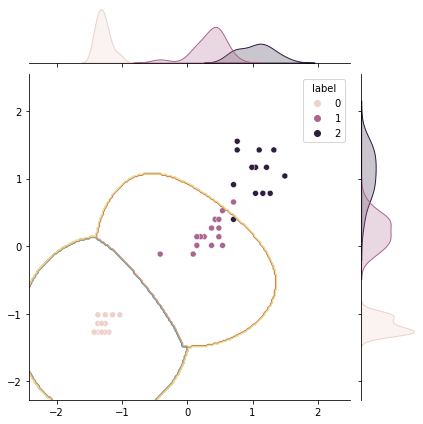

In [19]:
def plot_multiclass_decision(X, Y, model):
  h=0.02
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  graph=sns.jointplot(x=X[:, 0], y=X[:, 1], hue=Y)
  graph.ax_joint.contour(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plot_multiclass_decision(X_test, Y_test, model)

# Zadanie domowe 

## Strojenie modelu

Jeżeli interesuje nas otrzymanie najlepszego modelu to musimy znaleźć (dostroić) jego hiperparametry. Dla modelu SVM z jądrem możemy zmieniać hiperparametry takie jak `C`, rodzaj jądra i hiperparametry specyficzne dla jądra (`gamma` dla `rbf`, `degree` dla `poly`). Przeszukiwania takiej wielowymiarowej przestrzeni nie musimy implementować sami, gotowe narzędzia znajdują się w `sklearn.model_selection`:
- `GridSearchCV` wykonujący systematyczny skan przestrzeni hiperparametrów,
- `RandomizedSearchCV` losowo ją próbkujący.

**Proszę:**

* zaimportować moduły zawierające klasy `GridSearchCV`
* przygotować przestrzeń parametrów do przeszukania. Dla każdego typu jądra przygotuj słownik, gdzie kluczem jest nazwa parametru, a wartością jego zakres. Słownik powinien zawierać element o kluczu `kernel` i wartości będącej jednoelementową listą z nazwą jądra
  - dla wszystkich jąder przeszukaj parametr `C` w zakresie od 0.01 do 100 rozłożonym równomiernie w skali logarytmicznej (`np.logspace`).
  - dla jądra wielomianowego rozważ stopnie wielomianu równe 2,3,4.
  - dla jądra rbf przeszukaj parametr `gamma` w zakresie od 0.01 do 100 rozłożonym równomiernie w skali logarytmicznej,
  
  Przykład dla jądra wielomianowego:

```Python
parameters_poly=dict(kernel=['poly'], C=np.logspace(-2,2,30), degree=[2,3,4])
parameters_linear=...
parameters_rbf=...
parameters=[parameters_poly,parameters_linear, parameters_rbf]
```
  
* przygotować `GridSearchCV
` dla modelu `SVC` w zdefiniowanej przestrzeni parametrów. Jako kryterium oceniające model przyjmij `scoring = accuracy`,
* za pomocą `GridSearch.fit` znaleźć najlepsze parametry,
* wypisać znalezione najlepsze parametry modelu (`GridSearchCV.best_params_`),
* wypisać wynik najlepszego modelu (`GridSearchCV.best_score_`),
* wypisać wartości metryk dla najlepszego modelu
* narysować narysować granice decyzyjne najlepszego modelu (najlepszy model dostępny jest pod `GridSearchCV.best_estimator_`).
* stwierdzić czy najlepszy model jest lepszy od modelu które były trenowane poprzednio- wypisać znalezione najlepsze parametry modelu (`GridSearchCV.best_params_`),

Best params: {'C': 0.11721022975334802, 'gamma': 0.17433288221999882, 'kernel': 'rbf'}
Best score: 0.98095
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

Confusion matrix:
[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


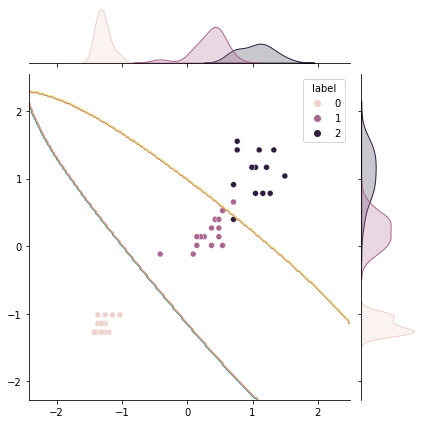

In [20]:
#BEGIN_SOLUTION
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from scipy.stats import uniform, expon

parameters_poly=dict(kernel=['poly'], C=np.logspace(-2,1,30), degree=[2,3,4,5,6])
parameters_linear=dict(kernel=['linear'], C=np.logspace(-2,1,30))
parameters_rbf=dict(kernel=['rbf'], C=np.logspace(-1,1,30), gamma=np.logspace(-2,2,30))
parameters=[parameters_poly, parameters_linear, parameters_rbf]
grid_search=GridSearchCV(SVC(),parameters, scoring='accuracy')
grid_search.fit(X_train,Y_train);

print(colored("Best params:","blue"),grid_search.best_params_)
print(colored("Best score:","blue"),"{:.5f}".format(grid_search.best_score_))
plot_multiclass_decision(X_test, Y_test, grid_search.best_estimator_)
printScores(grid_search.best_estimator_, X_test, Y_test) 
#END_SOLUTION

pass